In [1]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.pyplot import figure
from matplotlib import colors
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [2]:
def sample_class2():
    rad=np.random.uniform(2,3)
    theta=np.random.uniform(-np.pi,np.pi)
    return np.matrix([rad*np.cos(theta),rad*np.sin(theta)])

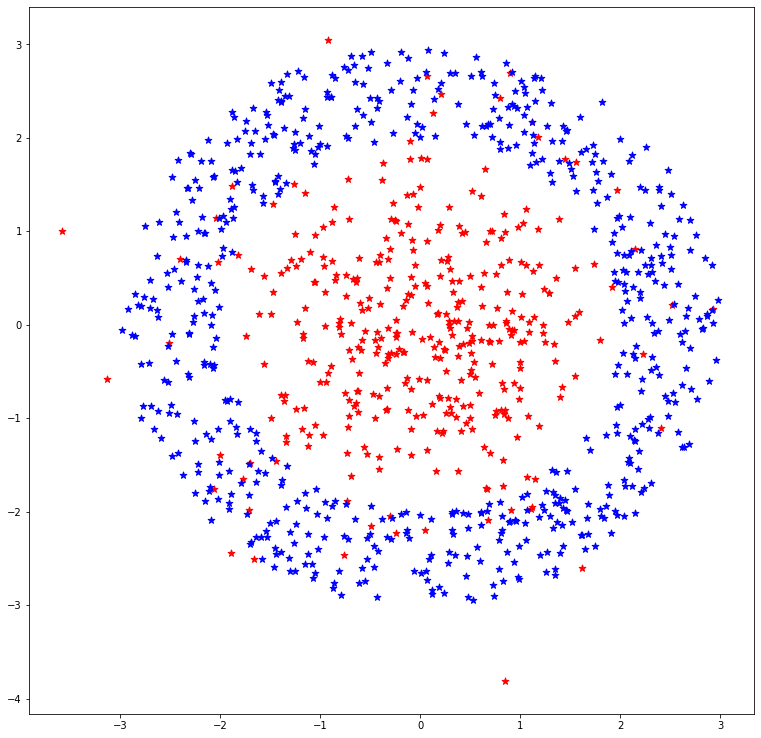

In [3]:
fig = plt.figure(figsize=(13,13));
prior=0.35
zero_mean=[0,0]
cov=[[1,0],[0,1]]
samples_class1=[]
samples_class2=[]
for num in range(1000):    
    uniform_sample=np.random.uniform()
    if uniform_sample<prior:
        sample=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()
        samples_class1.append(sample)
    else:
        sample=sample_class2().T
        samples_class2.append(sample)
samples_class1=np.hstack(samples_class1)
samples_class2=np.hstack(samples_class2)

a=np.squeeze(np.asarray(samples_class1.transpose()[:,1]))
b=np.squeeze(np.asarray(samples_class1.transpose()[:,0]))

c=np.squeeze(np.asarray(samples_class2.transpose()[:,1])) 
d=np.squeeze(np.asarray(samples_class2.transpose()[:,0]))

plt.scatter(b,a,color='r',marker='*',label='class 1',s=50)
plt.scatter(d,c,color='b',marker='*',label='class 1',s=50)

In [4]:
X=np.hstack([samples_class1,samples_class2])
X=X.T
X=np.squeeze(np.asarray(X))

In [5]:
X.shape

(1000, 2)

In [6]:
y = np.hstack((np.zeros(samples_class1.shape[1]), np.ones(samples_class2.shape[1])))

In [7]:
y.shape

(1000,)

In [32]:
svc = svm.SVC(probability=True)
parameters = {'C':np.logspace(4.47712125472, 5, 1, endpoint=True).tolist(),'gamma':np.logspace(-0.45593195565, 0, 1, endpoint=True).tolist()}
model = GridSearchCV(svc, parameters, cv=10)
model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [30000.000000023327],
                         'gamma': [0.3499999999997779]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
model.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [30000.000000023327],
                         'gamma': [0.3499999999997779]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
y_pred=model.predict(X)
np.sum(y_pred==y)

958

In [35]:
model.best_estimator_

SVC(C=30000.000000023327, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3499999999997779,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
def plot_SVM():
    from matplotlib.pyplot import figure
    fig = plt.figure(figsize=(15,10));
    plt.xlabel('Variable x1',size=13)
    plt.ylabel('Variable x2',size=13)
    fig.suptitle('Logistic Regression decision boundary for data from 2 Gaussians', fontsize=15)
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1] # True Positive for class 0 and class 1 respectively
    # tp0 is boolean with "tp and class=0"
    X0, X1 = X[y == 0], X[y == 1] # points 
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    
    # class 0: dots
    #plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='x', color='red')
    #plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x', s=20, color='#990000')  # dark red
    
    # class 1: dots
    #plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='white')
    #plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='*', s=20, color='#000099')  # dark blue
    plt.scatter(4,4,color='blue')
    plt.scatter(-4,-4,color='blue')
    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z=model.predict_proba((np.c_[xx.ravel(), yy.ravel()]))[:,1]
    Z=Z.reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, Z, cmap='plasma',norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black');
    plt.subplots_adjust(top=.95);


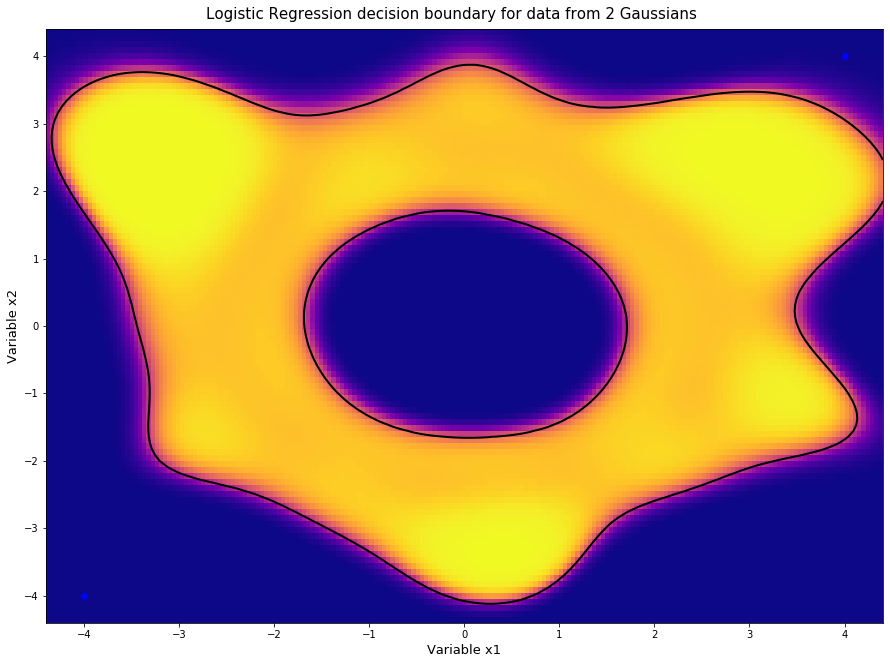

In [37]:
plot_SVM()

In [ ]:
import pandas as pd

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

In [ ]:
GridSearch_table_plot(model, "C", negative=False)